In [3]:
pip install plotly

     ---------------------------------------- 15.3/15.3 MB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# Google stock

In [5]:
df_g = pd.read_csv('GOOG_data.csv')

In [6]:
df_g.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [7]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    975 non-null    object 
 1   open    975 non-null    float64
 2   high    975 non-null    float64
 3   low     975 non-null    float64
 4   close   975 non-null    float64
 5   volume  975 non-null    int64  
 6   Name    975 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 53.4+ KB


In [8]:
df_g.drop('Name',axis=1,inplace=True)

In [9]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    975 non-null    object 
 1   open    975 non-null    float64
 2   high    975 non-null    float64
 3   low     975 non-null    float64
 4   close   975 non-null    float64
 5   volume  975 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ KB


In [10]:
df_g['date']= pd.to_datetime(df_g['date'])

In [11]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    975 non-null    datetime64[ns]
 1   open    975 non-null    float64       
 2   high    975 non-null    float64       
 3   low     975 non-null    float64       
 4   close   975 non-null    float64       
 5   volume  975 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 45.8 KB


# Checking outliers

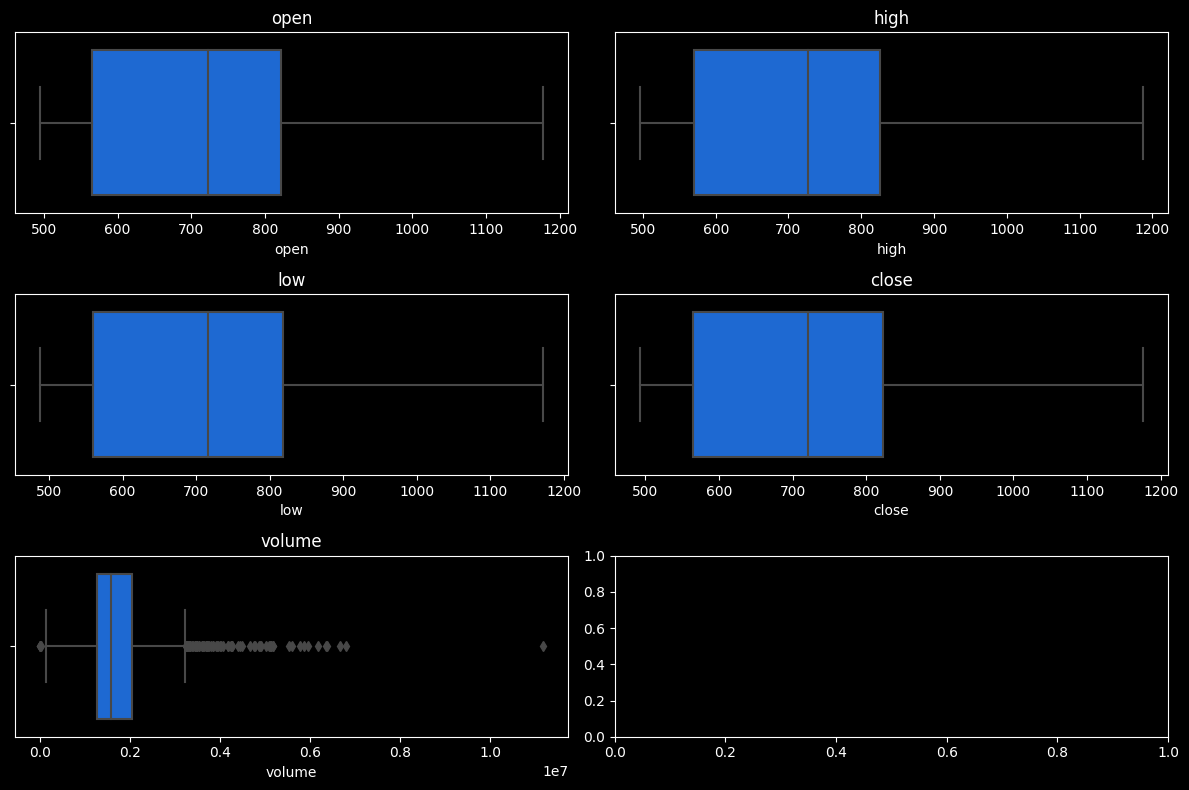

In [81]:
plt.style.use('dark_background')

num_df = df_g.select_dtypes(include = ['float64', 'int64']).columns

# Setting the number of rows and columns of the subplot grid
num_rows = (len(num_df) + 1) // 2
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize = (12, 8))
axs = axs.flatten()

# boxplot on each subplot
for i, col in enumerate(num_df):
    sns.boxplot(x = df_g[col], ax = axs[i], color = '#0064f0')
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

# EDA(Google)

# Open values during the years

In [47]:
fig =go.Figure(
        layout = go.Layout(
            title = 'Open values during the years',
            xaxis = dict(title = 'Date'),
            yaxis = dict(title = 'Value'),
            showlegend = False,
            paper_bgcolor = 'black',
            plot_bgcolor = 'black',
            width = 950,
            height = 600))

fig.add_trace(go.Scatter(x = df_g['date'], y = df_g['open'], mode ='lines', name = 'Open', line = dict(color = '#01E3F5')))

fig.show()

# Close values during the years

In [48]:
fig = go.Figure(
    layout = go.Layout(
        title = 'Close values during the years',
        xaxis = dict(title = 'Date'),
        yaxis = dict(title = 'Value'),
        showlegend = False,
        paper_bgcolor = 'black',
        plot_bgcolor = 'black',
        width = 950,
        height = 600
    )
)

fig.add_trace(go.Scatter(x = df_g['date'], y = df_g['close'], mode = 'lines', name = 'Close', line = dict(color = '#e900f5')))

fig.show()

# Lower values during the years

In [49]:
fig = go.Figure(
    layout = go.Layout(
        title = 'Lower values during the years',
        xaxis = dict(title = 'Date'),
        yaxis = dict(title = 'Value'),
        showlegend = False,
        paper_bgcolor = 'black',
        plot_bgcolor = 'black',
        width = 950,
        height = 600
    )
)

fig.add_trace(go.Scatter(x = df_g['date'], y = df_g['low'], mode = 'lines', name = 'Low', line = dict(color = '#29f500')))

fig.show()

# Highest values during the years

In [50]:
fig = go.Figure(
    layout = go.Layout(
        title = 'Highest values during the years',
        xaxis = dict(title = 'Date'),
        yaxis = dict(title = 'Value'),
        showlegend = False,
        paper_bgcolor = 'black',
        plot_bgcolor = 'black',
        width = 950,
        height = 600
    )
)

fig.add_trace(go.Scatter(x = df_g['date'], y = df_g['high'], mode = 'lines', name = 'High', line = dict(color = '#ed0505')))

fig.show()

# Open and close values during the years

In [ ]:
fig = go.Figure(
    layout = go.Layout(
        title = 'Open and close values during the years',
        xaxis = dict(title = 'Date'),
        yaxis = dict(title = 'Value'),
        legend = dict(bgcolor = 'black', orientation = 'h'),
        showlegend = True,
        paper_bgcolor = 'black',
        plot_bgcolor = 'black',
        width = 950,
        height = 600
    )
)

# Add line traces
fig.add_trace(go.Scatter(x = df_g['date'], y = df_g['open'], mode = 'lines', name = 'Open', line = dict(color = '#01E3F1')))
fig.add_trace(go.Scatter(x = df_g['date'], y = df_g['close'], mode = 'lines', name = 'Close', line = dict(color = '#e900f5')))

fig.show()

# Lower and Highest values during the years

In [52]:
fig = go.Figure(
    layout = go.Layout(
        title = 'Lower and Highest values during the years',
        xaxis = dict(title = 'Date'),
        yaxis = dict(title = 'Value'),
        legend = dict(bgcolor = 'black', orientation = 'h'),
        showlegend = True,
        paper_bgcolor = 'black',
        plot_bgcolor = 'black',
        width = 950,
        height = 600
    )
)

fig.add_trace(go.Scatter(x = df_g['date'], y = df_g['low'], mode = 'lines', name = 'Low', line = dict(color = '#f00000')))
fig.add_trace(go.Scatter(x = df_g['date'], y = df_g['high'], mode = 'lines', name = 'High', line = dict(color = '#09ed05')))

fig.show()

# Average volume per year

In [75]:
fig = go.Figure(
    layout = go.Layout(
        title = 'Average volume per year',
        xaxis = dict(title = 'Year'),
        yaxis = dict(title = 'Volume'),
        font = dict(color = 'white'),
        showlegend = False,
        paper_bgcolor = 'black',
        plot_bgcolor = 'black',
        width = 950,
        height = 600
    )
)

#monthly averages
df_g['year'] = df_g['date'].dt.year
df_mean = df_g.groupby('year')[['volume']].mean()

fig.add_trace(go.Bar(x = df_mean.index, y = df_mean['volume'], marker = dict(color = '#0064f0')))

fig.show()

# Average opening price per year

In [76]:
fig = go.Figure(
    layout = go.Layout(
        title = 'Average opening price per year',
        xaxis = dict(title = 'Year'),
        yaxis = dict(title = 'Volume'),
        font = dict(color = 'white'),
        showlegend = False,
        paper_bgcolor = 'black',
        plot_bgcolor = 'black',
        width = 950,
        height = 600
    )
)

df_mean = df_g.groupby('year')[['open']].mean()

fig.add_trace(go.Bar(
    x = df_mean.index,
    y = df_mean['open'],
    marker = dict(color = '#01E3F1'),
))

fig.show()

# Average closing price per year

In [77]:
fig = go.Figure(
    layout = go.Layout(
        plot_bgcolor = 'black',
        paper_bgcolor = 'black',
        title = 'Average closing price per year',
        title_font = dict(size = 20),
        xaxis = dict(title = 'Year'),
        yaxis = dict(title = 'Price'),
        showlegend = False,
        width = 950,
        height = 600
    )
)

df_mean = df_g.groupby('year')[['close']].mean()

fig.add_trace(go.Bar(
    x = df_mean.index,
    y = df_mean['close'],
    marker = dict(color = '#e900f5'),
))

fig.show()

# Average highest price per year

In [78]:
fig = go.Figure(
    layout = go.Layout(
        plot_bgcolor = 'black',
        paper_bgcolor = 'black',
        title = 'Average highest price per year',
        title_font = dict(size = 20),
        xaxis = dict(title = 'Year'),
        yaxis = dict(title = 'Price'),
        showlegend = False,
        width = 950,
        height = 600
    )
)

df_mean = df_g.groupby('year')[['high']].mean()

fig.add_trace(go.Bar(
    x = df_mean.index,
    y = df_mean['high'],
    marker = dict(color = '#09ed05'),
))

fig.show()

# Average lower price per year

In [79]:
fig = go.Figure(
    layout = go.Layout(
        plot_bgcolor = 'black',
        paper_bgcolor = 'black',
        title = 'Average lower price per year',
        title_font = dict(size = 20),
        xaxis = dict(title = 'Year'),
        yaxis = dict(title = 'Price'),
        showlegend = False,
        width = 950,
        height = 600
    )
)

df_mean = df_g.groupby('year')[['low']].mean()

fig.add_trace(go.Bar(
    x = df_mean.index,
    y = df_mean['low'],
    marker = dict(color = '#f00000'),
))

fig.show()

# Annual averages of the variables

In [80]:
fig = go.Figure(
    layout = go.Layout(
        plot_bgcolor = 'black',
        paper_bgcolor = 'black',
        title = 'Annual averages of the variables',
        xaxis = dict(title = 'Year'),
        yaxis = dict(title = 'Value'),
        legend = dict(bgcolor = 'black', orientation = 'h', x = 0.5, y = -0.2),
        template = 'plotly_dark'
    )    
)

# annual averages
df_media = df_g.groupby(df_g['date'].dt.year).mean()

fig.add_trace(go.Scatter(
    x = df_media.index,
    y = df_media['low'],
    mode = 'lines',
    name = 'Low',
    line = dict(color = '#f00000')
))

fig.add_trace(go.Scatter(
    x = df_media.index,
    y = df_media['high'],
    mode = 'lines',
    name = 'High',
    line = dict(color = '#09ed05')
))

fig.add_trace(go.Scatter(
    x = df_media.index,
    y = df_media['open'],
    mode = 'lines',
    name = 'Open',
    line = dict(color = '#01E3F1')
))

fig.add_trace(go.Scatter(
    x = df_media.index,
    y = df_media['close'],
    mode = 'lines',
    name = 'Close',
    line = dict(color = '#e900f5')
))

fig.show()

# Insights

• The more than 100% growth in Google stock from 2014 to 2018 indicates solid performance by the company during that period, reflecting Google's continued dominance in the technology.

 • The sharp drop at the end of the period suggests the possibility of a market shift that negatively affected Google's stock, which can be investigated to better understand the factors behind this drop.
 
 • The average trading volume of Google shares, reaching 2 million in 2015 and 1.7 million in 2018, demonstrates investor interest in this leading technology company.